In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
from datetime import timedelta
%matplotlib inline

In [2]:
claims = pd.read_csv('D:/Data Science/Python/Case Study/Case 3 - Insurance/claims.csv')
demog = pd.read_csv('D:/Data Science/Python/Case Study/Case 3 - Insurance/cust_demographics.csv') 

In [3]:
# Looking at first few rows
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
demog.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
# Ques1 Combining Datasets
combo = pd.merge(right = claims , left = demog, right_on= 'customer_id', left_on= 'CUST_ID', how = 'outer')
combo.drop(columns = 'customer_id', inplace = True)
combo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [6]:
combo.shape

(1107, 15)

In [7]:
# Ques2 Changing Any mismatched Data Type, 
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   incident_cause       1100 non-null   object 
 8   claim_date           1100 non-null   object 
 9   claim_area           1100 non-null   object 
 10  police_report        1100 non-null   object 
 11  claim_type           1100 non-null   object 
 12  claim_amount         1035 non-null   object 
 13  total_policy_claims  1090 non-null   float64
 14  fraudulent           1100 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [8]:
# Contact, dob , claimdate, claim amount
combo["DateOfBirth"] = pd.to_datetime(combo.DateOfBirth, format = "%d-%b-%y")
combo.loc[(combo.DateOfBirth.dt.year > 2020),"DateOfBirth"]=combo[combo.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
combo["claim_date"] = pd.to_datetime(combo.claim_date, format = "%m/%d/%Y")
combo["Contact"] = pd.to_numeric(combo.Contact.str.replace("-",""),downcast='float')
combo.head(2)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No


In [9]:
### Ques3. Changing Claim amount data type
combo["claim_amount"] = pd.to_numeric(combo.claim_amount.str.replace("$",""),downcast='float')


C:\Users\arora\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [10]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   float32       
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   float32       
 13  total_policy_claims  1090 non-nul

In [11]:
#Ques4 Alert Flag for unreported Claims
combo["flag"] = np.where(combo.police_report == 'No',0,np.where(combo.police_report == "Yes",1,np.nan))

combo.drop(columns = ["police_report"], inplace = True)


In [12]:
#Ques5 Removing Duplicated Customer Records
combo = combo.groupby('CUST_ID').first().reset_index(drop = True)
combo.head(3)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN


In [13]:
#Ques6 Check for Missing Values
combo.isna().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag                   299
dtype: int64

In [14]:
cat_col = ["incident_cause","claim_area","claim_type","fraudulent","flag",'total_policy_claims']
con_col = ['claim_amount']
#claimid, claim_date

for col in cat_col:
    combo[col] = combo[col].fillna(combo[col].mode()[0])
    
combo[con_col] = combo[con_col].fillna(combo[con_col].mean())
combo.head()


,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0


#### Filling Missing Claim Dates
To fill Missing Dates we consider Month which got Maximum Claims,and replace the Missing Claim Dates by first day of that month

In [15]:
pd.DataFrame(combo.groupby(combo['claim_date'].dt.month).claim_id.count().reset_index())

,claim_date,claim_id
0,1.0,105
1,2.0,90
2,3.0,111
3,4.0,102
4,5.0,93
5,6.0,92
6,7.0,106
7,8.0,89
8,9.0,77
9,10.0,121


In [16]:
# 10th month got maximum Claims
combo.loc[combo.claim_date.isnull(),'claim_date'] = pd.Timestamp('2017-10-01')

In [17]:
combo.isna().sum()

# The Claim ID is not in use, so we can leave them as NA

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               7
incident_cause         0
claim_date             0
claim_area             0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

In [18]:
combo["Age"] = round((combo.claim_date - combo.DateOfBirth).apply(lambda x: x.days)/365.25, 0)


In [19]:
combo['Age_grp'] = np.where(combo.Age <18,'Childen',np.where(combo.Age<30,'Youth',np.where(combo.Age<60,'Adult','Senior')))

In [20]:
combo.groupby('Age_grp').count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
Age_grp,,,,,,,,,,,,,,,
Adult,763,763,763,763,763,758,763,763,763,763,763,763,763,763,763
Childen,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Youth,320,320,320,320,320,318,320,320,320,320,320,320,320,320,320


In [21]:
#### Ques8 What is the average amount claimed by the Customers from Various Segments
combo.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12755.710938
Platinum    12370.138672
Silver      12271.163086
Name: claim_amount, dtype: float32

In [22]:
## Ques9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.
combo.loc[combo.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")


incident_cause
total_Crime                  724462.5
total_Driver error          3264286.0
total_Natural causes        1312706.0
total_Other causes          3812332.0
total_Other driver error    3318806.5
Name: claim_amount, dtype: float32

In [23]:
### Ques10 How many adults from TX, DE and AK claimed insurance for driver related issues and causes?
combo.loc[(combo.incident_cause.str.lower().str.contains("driver"))
             & (combo.State.isin(['TX','DE','AK'])) & (combo.Age_grp == 'Adult'),:].groupby(by = "State")['total_policy_claims'].count()


State
AK    8
DE    9
TX    7
Name: total_policy_claims, dtype: int64

In [24]:
### Ques11 Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.
f1 = combo.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,2122234.0
1,Female,Platinum,2381974.0
2,Female,Silver,1935970.0
3,Male,Gold,2622890.5
4,Male,Platinum,2120756.5


In [25]:
res = f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
res

gender,Female,Male
Segment,,
Gold,2122234.0,2622890.5
Platinum,2381974.0,2120756.5
Silver,1935970.0,2346666.0


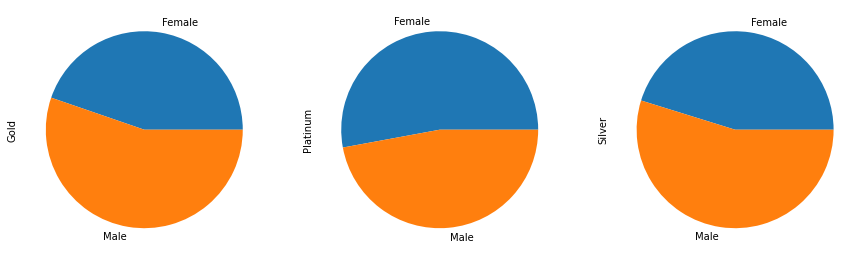

In [26]:
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()


In [27]:
#Ques 12 Among males and females, which gender had claimed the most for any type of driver related issues?
#This metric can be compared using a bar chart

p1 = combo.loc[(combo.incident_cause.str.lower().str.contains("driver")
               )].groupby("gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
p1

,gender,CountOf_gender
0,Female,221
1,Male,280


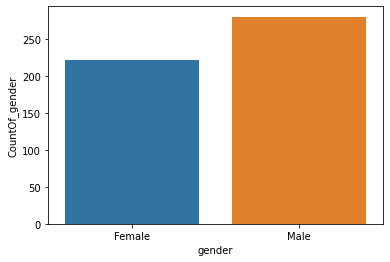

In [28]:
sns.barplot(x = "gender", y = "CountOf_gender", data = p1 )
plt.show()


In [29]:
## Ques13 Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.
p2 = combo.groupby("Age_grp")[["fraudulent"]].count().reset_index()
p2

,Age_grp,fraudulent
0,Adult,763
1,Childen,2
2,Youth,320


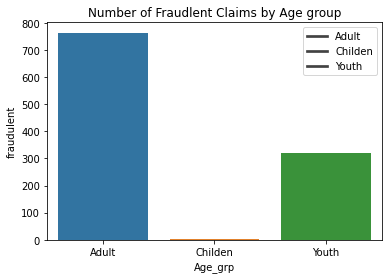

In [30]:
sns.barplot(x = 'Age_grp', y = 'fraudulent', data = p2)
plt.legend(['Adult','Childen','Youth'])
plt.title('Number of Fraudlent Claims by Age group')
plt.show()

In [31]:
#### Ques14 Monthly trend of Total Amount Claimed
d2 = pd.DataFrame(combo.groupby(combo['claim_date'].dt.month).claim_amount.sum().reset_index())
d2.columns = ['Claim_Month','claim_amount']
d2.head()

,Claim_Month,claim_amount
0,1,1332012.0
1,2,1133107.0
2,3,1320094.0
3,4,1276071.5
4,5,1114211.5


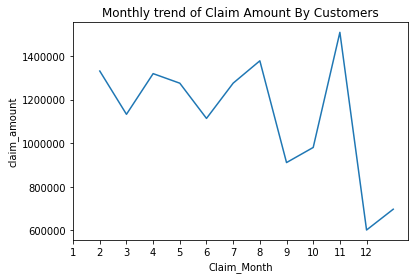

In [32]:
p3 = sns.lineplot(x = 'Claim_Month', y = 'claim_amount',data = d2)
p3.set_xticks(range(len(d2))) # <--- set the ticks first
p3.set_xticklabels(np.arange(1,13))
plt.ticklabel_format(style = 'plain',axis = 'y')
plt.title('Monthly trend of Claim Amount By Customers')
plt.show()

In [33]:
### Ques15 Avg Claim Amount by Gender and Age Category
d3 = combo.groupby(['gender','Age_grp','fraudulent']).claim_amount.sum().reset_index()
d3

,gender,Age_grp,fraudulent,claim_amount
0,Female,Adult,No,3524569.0
1,Female,Adult,Yes,1123669.0
2,Female,Childen,No,20200.0
3,Female,Youth,No,1500253.0
4,Female,Youth,Yes,271487.0
5,Male,Adult,No,3706210.5
6,Male,Adult,Yes,1416162.5
7,Male,Childen,No,24610.0
8,Male,Youth,No,1537355.0
9,Male,Youth,Yes,405975.0


C:\Users\arora\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


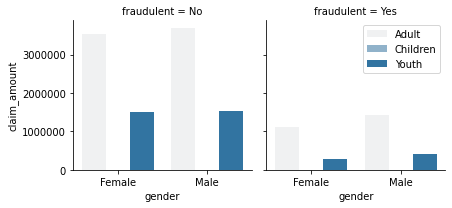

In [34]:
p4 = sns.FacetGrid(data = d3, col = 'fraudulent')
sns.set_palette("deep")
hue_order = ['Adult','Children','Youth']
p4.map(sns.barplot,'gender', 'claim_amount','Age_grp',hue_order = hue_order)
plt.legend()
plt.ticklabel_format(style = 'plain',axis = 'y')
plt.show()

#### Hypothesis Tests

#### Ques16 Similarity Between Amount Claimed by Males and Females


In [35]:
male_claim = combo.loc[combo.gender == 'Male','claim_amount']
female_claim = combo.loc[combo.gender == 'Female','claim_amount']

In [36]:
print('Mean of Male CLaim Amount :',male_claim.mean(), '| Mean of Female Claim Amount :', female_claim.mean())

Mean of Male CLaim Amount : 12821.54296875 | Mean of Female Claim Amount : 12105.59765625


In [37]:
stats.ttest_ind(male_claim,female_claim)

Ttest_indResult(statistic=0.884820659484728, pvalue=0.3764497634508194)

####  Ques17 Relationship Between Age Category and Segment

In [38]:
#Create a Observed Freq Table
c1 = pd.crosstab(combo.Segment,combo.Age_grp)
c1

Age_grp,Adult,Childen,Youth
Segment,,,
Gold,269,1,102
Platinum,246,1,117
Silver,248,0,101


In [39]:
stats.chi2_contingency(c1)

(3.0188850979195774,
 0.5546700133906691,
 4,
 array([[261.6       ,   0.68571429, 109.71428571],
        [255.97419355,   0.67096774, 107.35483871],
        [245.42580645,   0.64331797, 102.93087558]]))

#### Ques18 Current Year Claim has shown a rise in compared to 2016-2017 which was $10000

In [47]:
print('Max Date:',combo.claim_date.max(), '| Min Date:',combo.claim_date.min())

# Since the Data is of more than 1 Year, we seggregrate data for one year only

Max Date: 2018-10-30 00:00:00 | Min Date: 2017-01-01 00:00:00


In [63]:
r1 = combo[(combo.claim_date>'2017-01-01') & (combo.claim_date<'2018-01-01')]
r1.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,0.0,29.0,Youth
7,Female,1997-12-07,AL,4.877234e+09,Gold,87184588.0,Other causes,2017-10-10,Auto,Material and injury,21190.0,1.0,No,0.0,20.0,Youth
8,Male,1962-02-17,HI,3.215345e+09,Platinum,86240106.0,Driver error,2017-07-01,Auto,Material only,2490.0,2.0,No,0.0,55.0,Adult
10,Female,1980-04-27,WY,5.713972e+09,Platinum,3502909.0,Driver error,2017-03-22,Auto,Injury only,25010.0,1.0,No,0.0,37.0,Adult
11,Female,1995-02-03,TX,9.783527e+09,Silver,94303580.0,Crime,2017-04-25,Auto,Injury only,30540.0,1.0,No,1.0,22.0,Youth


In [57]:
print('Current Year Claim Amount Average:', round(r1.mean(),2))

Current Year Claim Amount Average: 12203.87


In [64]:
stats.ttest_1samp(r1.claim_amount,10000)

Ttest_1sampResult(statistic=4.057286412691767, pvalue=5.6312712832008426e-05)

#### Ques19 Any Difference between Age groups and Insurance Claims

In [91]:
combo.Age_grp.unique()
adult_claim = combo.loc[combo.Age_grp == 'Adult','claim_amount']
youth_claim = combo.loc[combo.Age_grp == 'Youth','claim_amount']
children_claim = combo.loc[combo.Age_grp == 'Childen','claim_amount']

In [92]:
print('Mean of Adult Claimed Amount : ',adult_claim.mean(),'| Mean of Youth Claimed Amount: ',youth_claim.mean() ,
      '| Mean of Children Claimed Amount: ',children_claim.mean())

Mean of Adult Claimed Amount :  12805.52734375 | Mean of Youth Claimed Amount:  11609.59375 | Mean of Children Claimed Amount:  22405.0


In [93]:
stats.f_oneway(adult_claim,youth_claim,children_claim)

F_onewayResult(statistic=1.466703903650297, pvalue=0.23114286395346859)

#### Ques20 Any Relationship Between Total Number of Policy claims and claimed amounts


In [65]:
stats.pearsonr(combo.total_policy_claims, combo.claim_amount)

(-0.014788607436125312, 0.6265474611750367)